## Implementando el Algoritmo de Aprendizaje Perceptron

In [1]:
import numpy as np

In [2]:
# perceptron.py
class Perceptron(object):
    
    """ Perceptron classifier
        Parameters
        ------------
        rate : float
        Learning rate (between 0.0 and 1.0)
        niter : int
        Passes over the training dataset.

        Attributes
        -----------
        weight : 1d-array
        Weights after fitting.
        errors : list
        Number of misclassifications in every epoch.
    """
    
    def __init__(self, rate = 0.01, niter = 10):
        self.rate = rate
        self.niter = niter

    def fit(self, X, y):
        """ Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        
        Returns
        -----------
        self : object
        """

        # weights
        self.weight = np.zeros(1 + X.shape[1])

        # Number of misclassifications
        self.errors = []  # Number of misclassifications

        for i in range(self.niter):
            err = 0
            for xi, target in zip(X, y):
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
                self.errors.append(err)
                
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

Usando esta implementación de la clase Perceptron, con una tasa de aprendizaje (learning rate) rate y n_iter, el cual es el número de epchs (recorrido sobre el conjunto de entrenamiento).

En el método fit inicializamos los pesos en el self.w_ 

Una vez que se han inicializado los pesos, el método de ajuste recorre todas las muestras individuales en el conjunto de entrenamiento y actualiza los pesos de acuerdo con la regla de aprendizaje del perceptrón. 

Las etiquetas de clase se predicen mediante el método predict(). Además, también recopilamos el número de clasificaciones erróneas durante cada época en la lista self.errors_ para que luego podamos analizar qué tan bien se desempeñó nuestro perceptrón durante el entrenamiento.

In [3]:
import pandas as pd

In [4]:
# Leer el archivo con los datos del proyecto Iris
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Iris dataset se compone de 3 clases de lirios: Iris-versicolor, Iris-setosa e Iris-virginica
Posee 50 registros por cada clase

In [6]:
df[4].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: 4, dtype: int64

In [7]:
# Visualizar los últimos registros
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
# Extrae del DataFrame los valores para el vector de target 
# seleccionamos los primeros 100 registros, estos pertenecen a dos clases: Iris-setosa y Iris-versicolor
y = df.iloc[0:100, 4].values

In [9]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [10]:
# Retorna los elementos desde y según la condición
# Si el valor es 'Iris-setosa' retorna -1, sino retorna 1
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [11]:
# Extrae del DataFrame los valores para el vector de características, osea, el vector de entrenamiento 
# solo dos valores característicos correspondientes a la logitud del sépalo y del pétalo
X = df.iloc[0:100, [0, 2]].values

In [12]:
import matplotlib.pyplot as plt

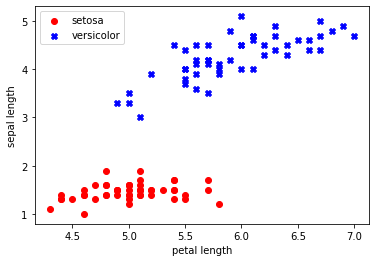

In [13]:
# Visualizar los datos gráficamente por medio del gráfico "scatter" de matplolib
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='X', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

### Obtener el modelo de clasificación

In [14]:
# Usar la clase Perceptron de perceptron.py
ppn = Perceptron(0.1, 10)
ppn.fit(X, y)

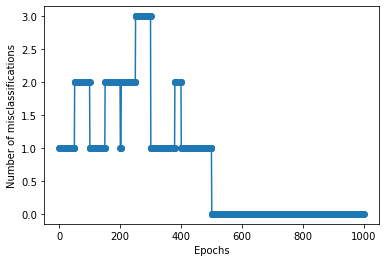

In [15]:
# Visualizar los errores de clasificación a través de las iteraciones
# deberíamos ver el gráfico de los errores de clasificación errónea frente al número de épocas.

plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()
# Podemos ver la gráfica de los errores de clasificación errónea frente al número de épocas como se muestra a continuación:
# Nuestro perceptrón convergió después de la sexta época (iteración). 
# Ahora podemos clasificar perfectamente las muestras de entrenamiento.

### Visualice los límites de decisión
Para visualizar los límites de decisión para nuestros conjuntos de datos 2D, implementemos una pequeña función de conveniencia:

In [17]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


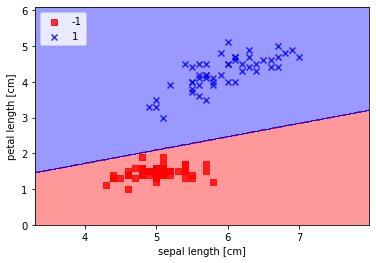

In [18]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

El perceptrón aprendió un límite de decisión que pudo clasificar perfectamente todas las muestras de flores en el subconjunto de entrenamiento de Iris.

Aunque el perceptrón clasificó perfectamente las dos clases de flores de Iris, la convergencia es uno de los mayores problemas del perceptrón.

Frank Rosenblatt demostró matemáticamente que la regla de aprendizaje del perceptrón converge si las dos clases pueden separarse mediante un hiperplano lineal.

Sin embargo, si las clases no se pueden separar perfectamente por tal límite de decisión lineal, los pesos nunca dejarán de actualizarse a menos que establezcamos un número máximo de épocas.

### Referencias
Inspirado en:
Raschka, S. (2015). Python machine learning. Packt publishing ltd.